# Arctic Project in Neural Networks

## Import libraries

In [1]:
library(neuralnet)
library(tidyverse)

── Attaching packages ──────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ─────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::compute() masks neuralnet::compute()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()



## Load data

In [2]:
arctic <- read.csv("arctic_data.csv",stringsAsFactors = F)

## Data segmentation

In [3]:
folds <- cut(seq(1,nrow(arctic)), breaks = 10, labels = FALSE) 

## Prediction

In [4]:
prediction <- as.data.frame(
    # loop 1:K
    sapply(1:10, FUN = function(i){
        testID <- which(folds == i, arr.ind = TRUE)
        test <- arctic[testID, ]
        train <- arctic[-testID, ] # set K-fold

        # print(test) # if needed

        # Neural Network
        nn = neuralnet(area~rainfall+daylight+population+CO2+ozone+ocean_temp+land_temp,
                       data=train, hidden = c(5,3))

        #plot(nn)

        # prediction output
        predict(nn,test)
    })
)

## Table gathering and merging

In [5]:
pred_gather <- gather(data=prediction, key="fold",value="prediction",1:10)
result <- as.data.frame(cbind(arctic[,c(1,2,3,6)],pred_gather))

## Calculate value of R^2

In [6]:
result["R^2"] <- ((result$area-result$prediction)^2)
R_square <- sum(result$`R^2`)/490
print(R_square)

[1] 0.004770088


## Plot line chart (Prediction vs True)

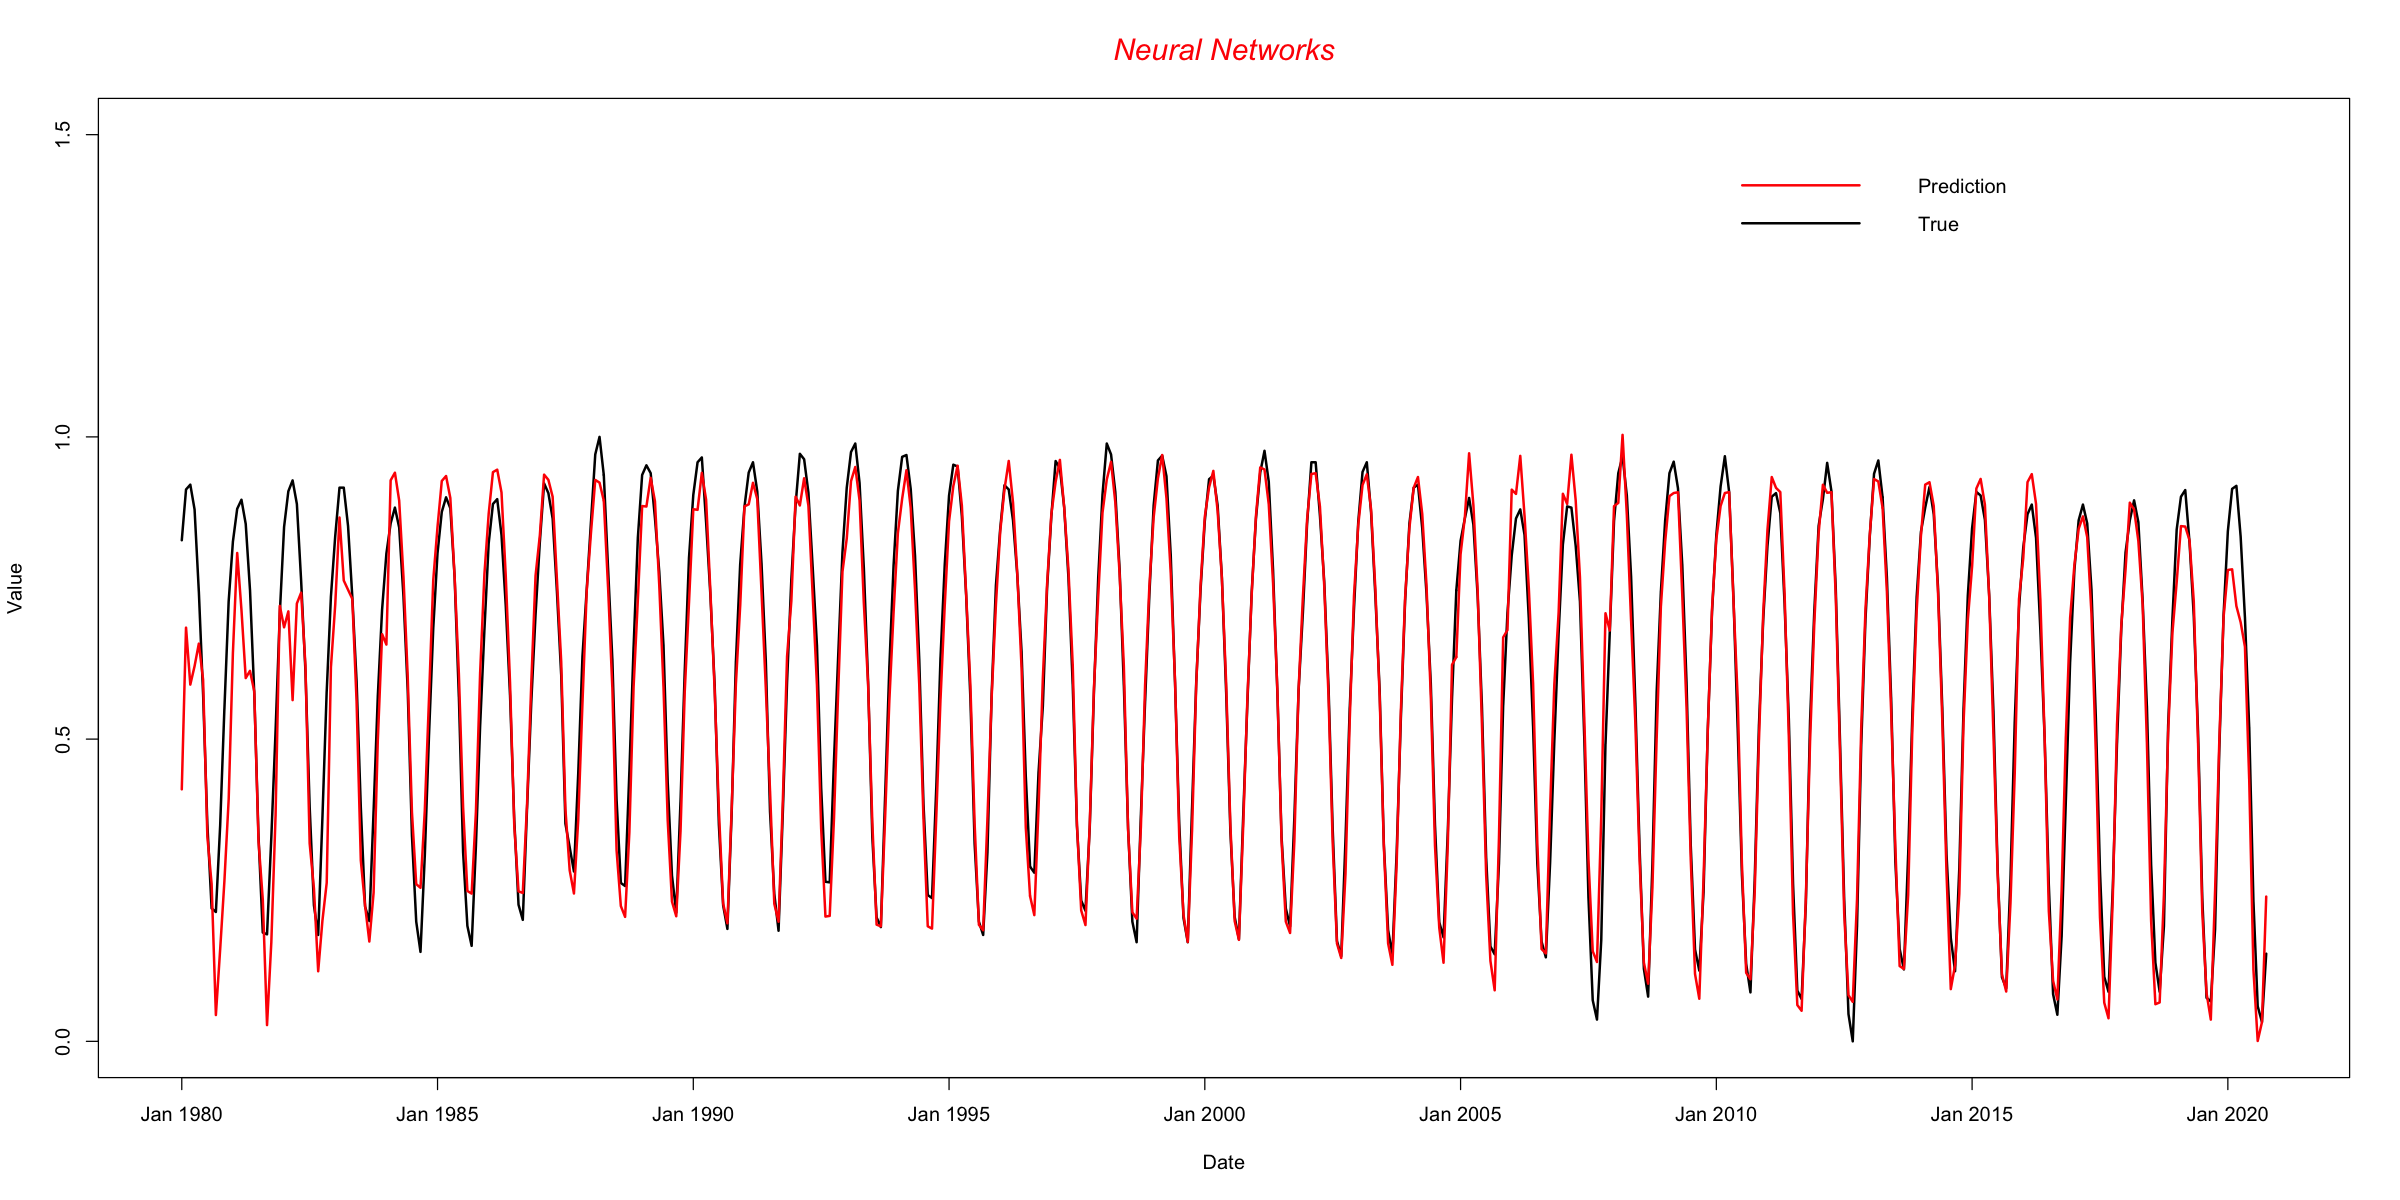

In [7]:
# figure size
options(repr.plot.width=20, repr.plot.height=10)

# plot
plot(result$observation,result$area,type ='l',ylim = c(0,1.5),lwd = '2',
     xlab = "Date", ylab = "Value", xaxt='n')
# attributes of prediction lines
lines(result$observation,result$prediction,lty=1,col='red',lwd = '2')

# x-axis labels
axis(1,at=c(1,61,121,181,241,301,361,421,481),
     labels=c("Jan 1980","Jan 1985","Jan 1990","Jan 1995","Jan 2000","Jan 2005","Jan 2010","Jan 2015","Jan 2020"))

# title
title(main = list("Neural Networks", cex = 1.5, col = "red", font = 3))

# legend
legend("topright", inset=.05, c("Prediction","True"),bty = 'n',lty=c(1, 1),  col=c("red", "black"),lwd =c(2, 2))

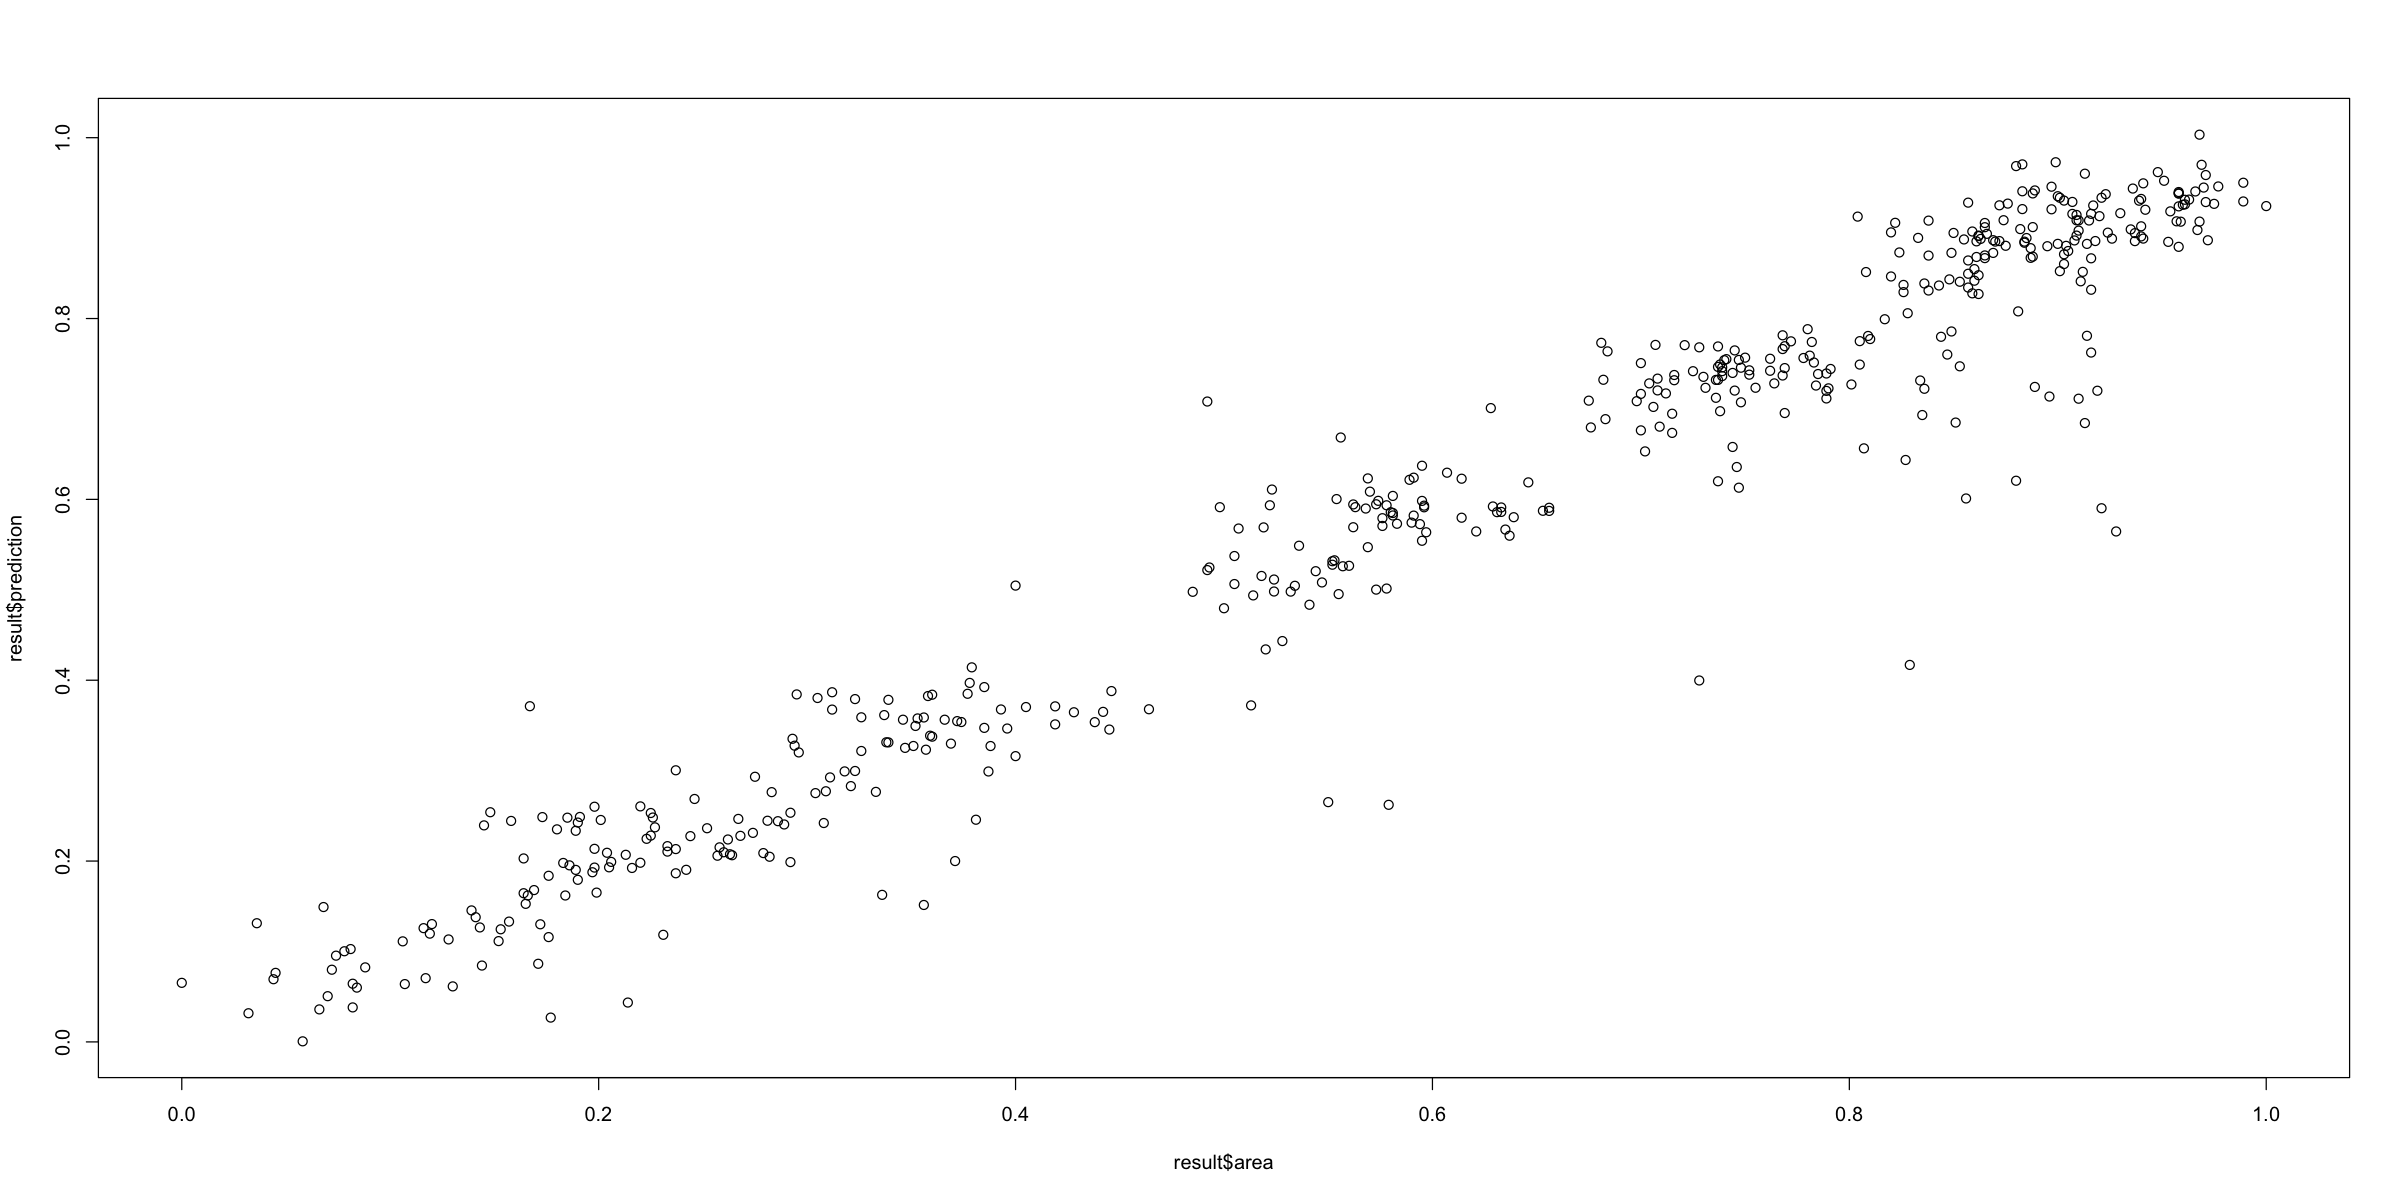

In [11]:
plot(result$area, result$prediction)